# Infilling All Complete Models

Applying infilling to all models to make sure they are complete. 

Note that the first runthrough will require collecting large amounts of data and hence will be slow. 

## Imports

In [1]:
import os.path

import pandas as pd
import pyam
import matplotlib.pyplot as plt
import numpy as np

import silicone.multiple_infillers as mi
import silicone.database_crunchers as cr
from silicone.utils import download_or_load_sr15

In c:\users\rlamboll\appdata\local\continuum\anaconda3\envs\iiasa-climate\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In c:\users\rlamboll\appdata\local\continuum\anaconda3\envs\iiasa-climate\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In c:\users\rlamboll\appdata\local\continuum\anaconda3\envs\iiasa-climate\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


<IPython.core.display.Javascript object>

pyam - INFO: Running in a notebook, setting `pyam` logging level to `logging.INFO` and adding stderr handler


## Our data

We download data from the SR1.5 database if it's not downloaded already. 

In [2]:
sr15_file = "./../input/complete_sr15.csv"
to_infill_file = "../output/allvar_co2_only_sr15_mscen.csv"
all_models = [
    'AIM/CGE 2.0', 'AIM/CGE 2.1', 'C-ROADS-5.005', 'GCAM 4.2', 'GENeSYS-MOD 1.0', 
    'IEA Energy Technology Perspective Model 2017', 'IEA World Energy Model 2017', 
    'IMAGE 3.0.1', 'IMAGE 3.0.2', 'MERGE-ETL 6.0', 'MESSAGE V.3', 'MESSAGE-GLOBIOM 1.0', 
    'MESSAGEix-GLOBIOM 1.0', 'POLES ADVANCE', 'POLES CD-LINKS', 'POLES EMF33', 'REMIND 1.5', 
    'REMIND 1.7', 'REMIND-MAgPIE 1.5', 'REMIND-MAgPIE 1.7-3.0', 
    'Shell World Energy Model 2018', 'WITCH-GLOBIOM 3.1', 'WITCH-GLOBIOM 4.2', 'WITCH-GLOBIOM 4.4'
]
required_variables_list = [
            "Emissions|BC",
            "Emissions|PFC|CF4",
            "Emissions|PFC|C2F6",
            "Emissions|PFC|C6F14",
            "Emissions|CH4",
            "Emissions|CO2",
            "Emissions|CO2|AFOLU",
            "Emissions|CO2|Energy and Industrial Processes",
            "Emissions|CO",
            "Emissions|HFC|HFC134a",
            "Emissions|HFC|HFC143a",
            "Emissions|HFC|HFC227ea",
            "Emissions|HFC|HFC23",
            "Emissions|HFC|HFC32",
            "Emissions|HFC|HFC43-10",
            "Emissions|HFC|HFC245ca",
            "Emissions|HFC|HFC125",
            "Emissions|N2O",
            "Emissions|NH3",
            "Emissions|NOx",
            "Emissions|OC",
            "Emissions|SF6",
            "Emissions|Sulfur",
            "Emissions|VOC",
        ]

df = download_or_load_sr15(sr15_file, all_models).filter(region="World", variable=required_variables_list) 
df.head()

pyam.core - INFO: Reading file `./../input/complete_sr15.csv`


,model,scenario,region,variable,unit,year,value
0,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,Emissions|BC,Mt BC/yr,2005,8.3367
1,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,Emissions|BC,Mt BC/yr,2010,7.6408
2,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,Emissions|BC,Mt BC/yr,2015,7.2724
3,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,Emissions|BC,Mt BC/yr,2020,7.0752
4,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,Emissions|BC,Mt BC/yr,2025,5.8486


### Comparing timelines
In order to establish the best infilling method, we should see how it compares to the other available trend lines. 

In [3]:
df_to_infill = pyam.IamDataFrame(to_infill_file).filter(variable=required_variables_list)
df_to_infill.timeseries()

pyam.core - INFO: Reading file `../output/allvar_co2_only_sr15_mscen.csv`


2000  \
model                 scenario                          region variable                                      unit              
AIM/CGE 2.1           TERL_15D_LowCarbonTransportPolicy World  Emissions|CO2                                 Mt CO2/yr   NaN   
                                                               Emissions|CO2|AFOLU                           Mt CO2/yr   NaN   
                                                               Emissions|CO2|Energy and Industrial Processes Mt CO2/yr   NaN   
                      TERL_15D_NoTransportPolicy        World  Emissions|CO2                                 Mt CO2/yr   NaN   
                                                               Emissions|CO2|AFOLU                           Mt CO2/yr   NaN   
...                                                                                                                      ...   
REMIND-MAgPIE 1.7-3.0 SMP_REF_Def                       World  Emissions|CO2|AFOLU                           Mt CO2/yr   NaN   
                                                               Emissions|CO2|Energy and Industrial Processes Mt CO2/yr   NaN   
                      SMP_REF_Sust                      World  Emissions|CO2                                 Mt CO2/yr   NaN   
                                                               Emissions|CO2|AFOLU                           Mt CO2/yr   NaN   
                                                               Emissions|CO2|Energy and Industrial Processes Mt CO2/yr   NaN   

                                                                                                                              2005  \
model                 scenario                          region variable                                      unit                    
AIM/CGE 2.1           TERL_15D_LowCarbonTransportPolicy World  Emissions|CO2                                 Mt CO2/yr  32974.8985   
                                                               Emissions|CO2|AFOLU                           Mt CO2/yr   4591.2038   
                                                               Emissions|CO2|Energy and Industrial Processes Mt CO2/yr  28298.4420   
                      TERL_15D_NoTransportPolicy        World  Emissions|CO2                                 Mt CO2/yr  32974.8985   
                                                               Emissions|CO2|AFOLU                           Mt CO2/yr   4591.2038   
...                                                                                                                            ...   
REMIND-MAgPIE 1.7-3.0 SMP_REF_Def                       World  Emissions|CO2|AFOLU                           Mt CO2/yr   4548.1617   
                                                               Emissions|CO2|Energy and Industrial Processes Mt CO2/yr  29273.0245   
                      SMP_REF_Sust                      World  Emissions|CO2                                 Mt CO2/yr  33821.1862   
                                                               Emissions|CO2|AFOLU                           Mt CO2/yr   4548.1617   
                                                               Emissions|CO2|Energy and Industrial Processes Mt CO2/yr  29273.0245   

                                                                                                                              2010  \
model                 scenario                          region variable                                      unit                    
AIM/CGE 2.1           TERL_15D_LowCarbonTransportPolicy World  Emissions|CO2                                 Mt CO2/yr  33899.2827   
                                                               Emissions|CO2|AFOLU                           Mt CO2/yr   3276.0557   
                                                               Emissions|CO2|Energy and Industrial Processes Mt CO2/yr  30533.4199   
                      TERL_15D_NoTransport

We want to infill only using model/scenario pairs not in the data being infilled (although potentially this would leave us without some variables, in practice this is not the case)

In [4]:
df.set_meta("split_2", name="Split")
mod_scens_have_lead = df.data[["model", "scenario", "region"]].drop_duplicates()
df.set_meta("split_1", name="Split", index=mod_scens_have_lead)
df_incomplete = df.filter(Split="split_1")
print("variables in the filtered dataset: {}".format(len(df.variables())))
print("variables in the original dataset: {}".format(len(df_incomplete.variables())))

variables in the filtered dataset: 23
variables in the original dataset: 23


We see that the CO$_2$ results are well within the expected range. This means we can use an absolute value infilling method. We also see that there are not many paths with a very similar curve. Temporal consistency would point us towards using the RMS closest method, conservatism of the estimate and mathching the behaviour at each time would point towards using the quantile rolling window method. Other infillers are more speculative. We shall see how the methods vary. 

In [5]:
lead = ["Emissions|CO2"]
times_wanted = range(2020, 2101, 10)
quantile_infilled = mi.infill_all_required_variables(
    df_to_infill,
    df_incomplete,
    variable_leaders=lead,
    required_variables_list=None, # This will automatically use the complete set of variables
    cruncher=cr.QuantileRollingWindows,
    output_timesteps=times_wanted,
    infilled_data_prefix=None,
    to_fill_old_prefix=None,
    check_data_returned=False,
)

c:\users\rlamboll\appdata\local\continuum\anaconda3\envs\iiasa-climate\lib\site-packages\silicone\multiple_infillers\infill_all_required_emissions_for_openscm.py:180: UserWarning: No data for ['Emissions|HFC|HFC245ca'], it will be infilled with 0s
  unavailable_variables
Filling required variables: 100%|██████████████████████████████████████████████████████| 22/22 [00:08<00:00,  2.56it/s]


The warning informs us that the database has no data for HFC245ca. The default behaviour is to infill it with 0s, but this may well not be the best choice - it is simply the most comparable with the existing database. 

In [6]:
quantile_infilled.filter(variable="*HFC245ca").data.head()

,model,scenario,region,variable,unit,year,value
99,AIM/CGE 2.1,TERL_15D_LowCarbonTransportPolicy,World,Emissions|HFC|HFC245ca,Mt CO2-equiv/yr,2020,0.0
100,AIM/CGE 2.1,TERL_15D_LowCarbonTransportPolicy,World,Emissions|HFC|HFC245ca,Mt CO2-equiv/yr,2030,0.0
101,AIM/CGE 2.1,TERL_15D_LowCarbonTransportPolicy,World,Emissions|HFC|HFC245ca,Mt CO2-equiv/yr,2040,0.0
102,AIM/CGE 2.1,TERL_15D_LowCarbonTransportPolicy,World,Emissions|HFC|HFC245ca,Mt CO2-equiv/yr,2050,0.0
103,AIM/CGE 2.1,TERL_15D_LowCarbonTransportPolicy,World,Emissions|HFC|HFC245ca,Mt CO2-equiv/yr,2060,-0.0


Other data is infilled as expected

In [7]:
quantile_infilled.timeseries().head()

2020  \
model       scenario                          region variable            unit                      
AIM/CGE 2.1 TERL_15D_LowCarbonTransportPolicy World  Emissions|BC        Mt BC/yr       6.654007   
                                                     Emissions|CH4       Mt CH4/yr    361.219883   
                                                     Emissions|CO        Mt CO/yr     804.404781   
                                                     Emissions|CO2       Mt CO2/yr  38995.428200   
                                                     Emissions|CO2|AFOLU Mt CO2/yr   3330.565200   

                                                                                            2030  \
model       scenario                          region variable            unit                      
AIM/CGE 2.1 TERL_15D_LowCarbonTransportPolicy World  Emissions|BC        Mt BC/yr       5.286681   
                                                     Emissions|CH4       Mt CH4/yr    235.871729   
                                                     Emissions|CO        Mt CO/yr     697.456907   
                                                     Emissions|CO2       Mt CO2/yr  19725.436300   
                                                     Emissions|CO2|AFOLU Mt CO2/yr    -61.283600   

                                                                                           2040  \
model       scenario                          region variable            unit                     
AIM/CGE 2.1 TERL_15D_LowCarbonTransportPolicy World  Emissions|BC        Mt BC/yr      4.235618   
                                                     Emissions|CH4       Mt CH4/yr   206.959668   
                                                     Emissions|CO        Mt CO/yr    574.553501   
                                                     Emissions|CO2       Mt CO2/yr  6200.645700   
                                                     Emissions|CO2|AFOLU Mt CO2/yr -2422.261400   

                                                                                           2050  \
model       scenario                          region variable            unit                     
AIM/CGE 2.1 TERL_15D_LowCarbonTransportPolicy World  Emissions|BC        Mt BC/yr      3.620493   
                                                     Emissions|CH4       Mt CH4/yr   195.644655   
                                                     Emissions|CO        Mt CO/yr    482.187992   
                                                     Emissions|CO2       Mt CO2/yr  1749.397500   
                                                     Emissions|CO2|AFOLU Mt CO2/yr -2934.909600   

                                                                                           2060  \
model       scenario                          region variable            unit                     
AIM/CGE 2.1 TERL_15D_LowCarbonTransportPolicy World  Emissions|BC        Mt BC/yr      3.147906   
                                                     Emissions|CH4       Mt CH4/yr   184.844740   
                                                     Emissions|CO        Mt CO/yr    424.100988   
                                                     Emissions|CO2       Mt CO2/yr -2602.216000   
                                                     Emissions|CO2|AFOLU Mt CO2/yr -3679.951600   

                                                                                           2070  \
model       scenario                          region variable            unit                     
AIM/CGE 2.1 TERL_15D_LowCarbonTransportPolicy World  Emissions|BC        Mt BC/yr      2.797099   
                                                     Emissions|CH4       Mt CH4/yr   181.965481   
                                                     Emissions|CO        Mt CO/yr    393.977372   
                                                     Emissions|CO2       Mt CO2/yr -4687.898000   
              

This is now a complete dataset that we can use in climate simulations (after we append the original CO$_2$). 

In [8]:
df_to_infill.variables()

0                                    Emissions|CO2
1                              Emissions|CO2|AFOLU
2    Emissions|CO2|Energy and Industrial Processes
Name: variable, dtype: object

We repeat the process for the other crunchers to compare results, starting with RMS closest. 

In [9]:
closest_infilled = mi.infill_all_required_variables(
    df_to_infill,
    df_incomplete,
    variable_leaders=lead,
    required_variables_list=None, # This will automatically use the complete set of variables
    cruncher=cr.RMSClosest,
    output_timesteps=times_wanted,
    infilled_data_prefix=None,
    to_fill_old_prefix=None,
    check_data_returned=False,
)

c:\users\rlamboll\appdata\local\continuum\anaconda3\envs\iiasa-climate\lib\site-packages\silicone\multiple_infillers\infill_all_required_emissions_for_openscm.py:180: UserWarning: No data for ['Emissions|HFC|HFC245ca'], it will be infilled with 0s
  unavailable_variables
Filling required variables: 100%|██████████████████████████████████████████████████████| 22/22 [02:03<00:00,  5.60s/it]


For the interpolate specified model method, we use the REMIND-MAgPIE 1.5 model with scenarios beginning SSP5. It's most efficient to do the filtering outside the multiple infiller, rather than repeat it for every variable within the `infill_all_required_variables function`. Unfortunately this limits the number of variables infilled to those found in the original database. 

In [10]:
df_spec = df.filter(model="REMIND-MAgPIE 1.5", scenario="SSP5*")
interp_spec_infilled = mi.infill_all_required_variables(
    df_to_infill,
    df_spec,
    variable_leaders=lead,
    required_variables_list=None, # This will automatically use the complete set of variables
    cruncher=cr.LinearInterpolation,
    output_timesteps=times_wanted,
    infilled_data_prefix=None,
    to_fill_old_prefix=None,
    check_data_returned=False,
)

c:\users\rlamboll\appdata\local\continuum\anaconda3\envs\iiasa-climate\lib\site-packages\silicone\multiple_infillers\infill_all_required_emissions_for_openscm.py:180: UserWarning: No data for ['Emissions|PFC|CF4', 'Emissions|PFC|C2F6', 'Emissions|PFC|C6F14', 'Emissions|HFC|HFC134a', 'Emissions|HFC|HFC143a', 'Emissions|HFC|HFC227ea', 'Emissions|HFC|HFC23', 'Emissions|HFC|HFC32', 'Emissions|HFC|HFC43-10', 'Emissions|HFC|HFC245ca', 'Emissions|HFC|HFC125', 'Emissions|SF6'], it will be infilled with 0s
  unavailable_variables
Filling required variables: 100%|██████████████████████████████████████████████████████| 11/11 [00:02<00:00,  4.75it/s]


In [11]:
interp_spec_infilled.filter(scenario="CEMICS-1.5-CDR12").timeseries()

2020  \
model      scenario         region variable                                      unit                          
REMIND 1.7 CEMICS-1.5-CDR12 World  Emissions|BC                                  Mt BC/yr             6.6828   
                                   Emissions|CH4                                 Mt CH4/yr          407.7094   
                                   Emissions|CO                                  Mt CO/yr           755.3995   
                                   Emissions|CO2                                 Mt CO2/yr        45912.1453   
                                   Emissions|CO2|AFOLU                           Mt CO2/yr         6768.4403   
                                   Emissions|CO2|Energy and Industrial Processes Mt CO2/yr        39143.7050   
                                   Emissions|HFC|HFC125                          Mt CO2-equiv/yr      0.0000   
                                   Emissions|HFC|HFC134a                         Mt CO2-equiv/yr      0.0000   
                                   Emissions|HFC|HFC143a                         Mt CO2-equiv/yr      0.0000   
                                   Emissions|HFC|HFC227ea                        Mt CO2-equiv/yr      0.0000   
                                   Emissions|HFC|HFC23                           Mt CO2-equiv/yr      0.0000   
                                   Emissions|HFC|HFC245ca                        Mt CO2-equiv/yr      0.0000   
                                   Emissions|HFC|HFC32                           Mt CO2-equiv/yr      0.0000   
                                   Emissions|HFC|HFC43-10                        Mt CO2-equiv/yr      0.0000   
                                   Emissions|N2O                                 kt N2O/yr        11994.3615   
                                   Emissions|NH3                                 Mt NH3/yr           49.8755   
                                   Emissions|NOx                                 Mt NO2/yr          116.5144   
                                   Emissions|OC                                  Mt OC/yr            28.1455   
                                   Emissions|PFC|C2F6                            Mt CO2-equiv/yr      0.0000   
                                   Emissions|PFC|C6F14                           Mt CO2-equiv/yr      0.0000   
                                   Emissions|PFC|CF4                             Mt CO2-equiv/yr      0.0000   
                                   Emissions|SF6                                 Mt CO2-equiv/yr      0.0000   
                                   Emissions|Sulfur                              Mt SO2/yr           77.2394   
                                   Emissions|VOC                                 Mt VOC/yr          155.4962   

                                                                                                        2030  \
model      scenario         region variable                                      unit                          
REMIND 1.7 CEMICS-1.5-CDR12 World  Emissions|BC                                  Mt BC/yr             5.3788   
                                   Emissions|CH4                                 Mt CH4/yr          287.3396   
                                   Emissions|CO                                  Mt CO/yr           612.7476   
                                   Emissions|CO2                                 Mt CO2/yr        21833.6300   
                                   Emissions|CO2|AFOLU                           Mt CO2/yr          315.1738   
                                   Emissions|CO2|Energy and Industrial Processes Mt CO2/yr        21524.3200   
                                   Emissions|HFC|HFC125                          Mt CO2-equiv/yr      0.0000   
                                   Emissions|HFC|HFC134a                         Mt CO2-equiv/yr      0.0000   
                                   Emissions|HFC|HFC143a               

In this case, many variables could not be found. This can be improved by using a more complete set of scenarios, or a combination of different scenarios for different variables, however we do not necessarily have a good reason to expect the scenarios to be so applicable. For instance, we might use the IMAGE 3.0.1 model with the IMA15 scenarios, as they are the only source of data for the PFCs. 

In [12]:
unavailable_gases = [
    'Emissions|PFC|CF4', 'Emissions|PFC|C2F6', 'Emissions|PFC|C6F14', 'Emissions|HFC|HFC134a', 
    'Emissions|HFC|HFC143a', 'Emissions|HFC|HFC227ea', 'Emissions|HFC|HFC23', 'Emissions|HFC|HFC32', 
    'Emissions|HFC|HFC43-10', 'Emissions|HFC|HFC245ca', 'Emissions|HFC|HFC125', 'Emissions|SF6'
]
complete_data_df = df.filter(model="IMAGE 3.0.1", scenario="IMA15*")
interp_spec_infilled=pyam.IamDataFrame(interp_spec_infilled.data)
interp_spec_infilled_complete = interp_spec_infilled.filter(variable=unavailable_gases, keep=False)
interp_spec_infilled_completer = mi.infill_all_required_variables(
    df_to_infill,
    complete_data_df,
    variable_leaders=lead,
    required_variables_list=unavailable_gases,
    cruncher=cr.LinearInterpolation,
    output_timesteps=times_wanted,
    infilled_data_prefix=None,
    to_fill_old_prefix=None,
    check_data_returned=False,
)
interp_spec_infilled_completer = pyam.IamDataFrame(interp_spec_infilled_completer.data)
interp_spec_infilled_complete.append(interp_spec_infilled_completer.filter(variable=unavailable_gases), inplace=True)

c:\users\rlamboll\appdata\local\continuum\anaconda3\envs\iiasa-climate\lib\site-packages\silicone\multiple_infillers\infill_all_required_emissions_for_openscm.py:180: UserWarning: No data for ['Emissions|HFC|HFC245ca'], it will be infilled with 0s
  unavailable_variables
Filling required variables: 100%|██████████████████████████████████████████████████████| 11/11 [00:01<00:00,  8.42it/s]


We can also interpolate using all values, which will find all variables in the infiller database. However this is rarely a good idea with a large database, as the chaotic results shown later depict.

In [13]:
interp_infilled = mi.infill_all_required_variables(
    df_to_infill,
    df_incomplete,
    variable_leaders=lead,
    required_variables_list=None, # This will automatically use the complete set of variables
    cruncher=cr.LinearInterpolation,
    output_timesteps=times_wanted,
    infilled_data_prefix=None,
    to_fill_old_prefix=None,
    check_data_returned=False,
)

Filling required variables: 100%|██████████████████████████████████████████████████████| 22/22 [00:05<00:00,  4.04it/s]


In [14]:
interp_spec_infilled.variables()

0                                      Emissions|BC
1                                     Emissions|CH4
2                                      Emissions|CO
3                                     Emissions|CO2
4                               Emissions|CO2|AFOLU
5     Emissions|CO2|Energy and Industrial Processes
6                              Emissions|HFC|HFC125
7                             Emissions|HFC|HFC134a
8                             Emissions|HFC|HFC143a
9                            Emissions|HFC|HFC227ea
10                              Emissions|HFC|HFC23
11                           Emissions|HFC|HFC245ca
12                              Emissions|HFC|HFC32
13                           Emissions|HFC|HFC43-10
14                                    Emissions|N2O
15                                    Emissions|NH3
16                                    Emissions|NOx
17                                     Emissions|OC
18                               Emissions|PFC|C2F6
19          

Finally we can compare to the EQW method, used in existing literature. 

In [15]:
EQW_infilled = mi.infill_all_required_variables(
    df_to_infill,
    df_incomplete,
    variable_leaders=lead,
    required_variables_list=None, # This will automatically use the complete set of variables
    cruncher=cr.EqualQuantileWalk,
    output_timesteps=times_wanted,
    infilled_data_prefix=None,
    to_fill_old_prefix=None,
    check_data_returned=False,
)

Filling required variables: 100%|██████████████████████████████████████████████████████| 22/22 [00:05<00:00,  3.95it/s]


Text(0.5, 1.0, 'Methane emissions infilled with different methods')

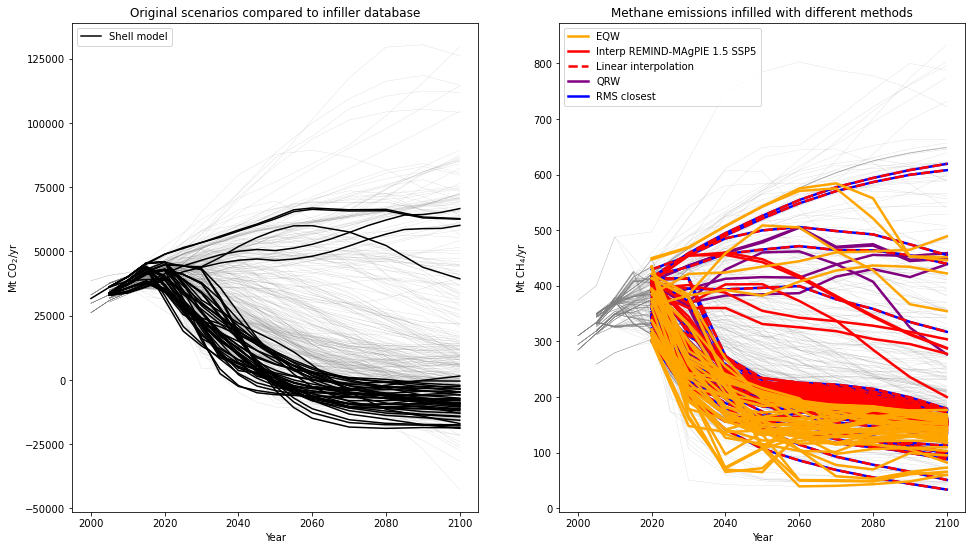

In [16]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(121)
df.filter(variable=lead, year=df_to_infill.data["year"].unique()).line_plot(
    ax=ax, linewidth=0.1, label='_nolegend_', color="grey"
)
df_to_infill.filter(variable=lead).line_plot(ax=ax, color="black", label="Shell model")
ax.set_title("Original scenarios compared to infiller database")
ax.set_ylabel("Mt CO$_2$/yr")
ax = fig.add_subplot(122)
df.filter(variable="Emissions|CH4", year=df_to_infill.data["year"].unique()).line_plot(
    ax=ax, linewidth=0.1, label='_nolegend_', color="grey"
)
quantile_infilled.filter(variable="Emissions|CH4").line_plot(
    ax=ax, linewidth=2.5, color="purple", label="QRW"
)
closest_infilled.filter(variable="Emissions|CH4").line_plot(
    ax=ax, color="blue", linewidth=2.5, label="RMS closest"
)
interp_spec_infilled.filter(variable="Emissions|CH4").line_plot(
    ax=ax, color="red", linewidth=2.5, label="Interp REMIND-MAgPIE 1.5 SSP5"
)
interp_infilled.filter(variable="Emissions|CH4").line_plot(
    ax=ax, color="red", linewidth=2.5, label="Linear interpolation", linestyle="--"
)
EQW_infilled.filter(variable="Emissions|CH4").line_plot(
    ax=ax, color="orange", linewidth=2.5, label="EQW"
)
ax.set_ylabel("Mt CH$_4$/yr")
ax.set_title("Methane emissions infilled with different methods")

In [17]:
savestring = "../output/infilled_sr15/complete_sr15_infilledwith_{}.csv"
quantile_infilled.to_csv(savestring.format("QRW"))
closest_infilled.to_csv(savestring.format("RMS closest"))
interp_spec_infilled.to_csv(savestring.format("Interp REMIND-MAgPIE 1.5 SSP5"))
interp_spec_infilled_complete.to_csv(savestring.format("Interp AIM_GCE 2.1 Transport"))
EQW_infilled.to_csv(savestring.format("EQW"))